### 0. EDA och filhantering (*)
  a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [4]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import shutil
import random 
from PIL import Image
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

In [2]:
#image_folder_path = "original_data/train"

# Create list with all images
#all_images = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

# Pick 10 random pictures from the list
#random_images = sample(all_images, 10)

#def load_image(image_path):
    #img = cv2.imread(image_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #return img

#def plot_images(images, labels):
    #fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    #for i, (image, label) in enumerate(zip(images, labels)):
       # ax = axes[i // 5, i % 5]
       # ax.imshow(image)
       # ax.set_title(label)
       # ax.axis('off')
    #plt.show()

# Load images
#images = [load_image(image_path) for image_path in random_images]
#labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

#plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:

In [3]:
'''
paths = [
    'experiment_small_data/test',
    'experiment_small_data/train',
    'experiment_small_data/val',
    'experiment_tiny_data/test',
    'experiment_tiny_data/train',
    'experiment_tiny_data/val',
    'original_data'
]'''

# Create folders
#for path in paths:
    #Path(path).mkdir(parents=True, exist_ok=True)

"\npaths = [\n    'experiment_small_data/test',\n    'experiment_small_data/train',\n    'experiment_small_data/val',\n    'experiment_tiny_data/test',\n    'experiment_tiny_data/train',\n    'experiment_tiny_data/val',\n    'original_data'\n]"

d) Nu ska du göra train|val|test split med följande splits:
- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

In [5]:
#Check if the environment variable KAGGLE_KERNEL_RUN_TYPE is set
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    current_path = Path('/kaggle/input/experiment-small-data')
    experiment_small_data = current_path/'experiment_small_data'
else:
    current_path= Path().absolute()      

test_path= experiment_small_data/'test'  
train_path= experiment_small_data/'train'
val_path= experiment_small_data/'val'

In [5]:
#original_data = 'original_data/train'  
#experiment_small_data = 'experiment_small_data' 

In [6]:
# def copy_files(files, subdir):
#     for file in files:
#         # Copy files from 'source_dir' to 'target_dir'
#         shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# # Read files and shuffle
# dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
# cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
# np.random.shuffle(dog_files)
# np.random.shuffle(cat_files)

# train_dogs, val_dogs, test_dogs = 800, 200, 250
# train_cats, val_cats, test_cats = 800, 200, 250

# # Sampling without replacement for dogs 
# dogs_train = dog_files[:train_dogs]
# dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
# dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

# copy_files(dogs_train, 'train')
# copy_files(dogs_val, 'val')
# copy_files(dogs_test, 'test')

# # Sampling without replacement for cats
# cats_train = cat_files[:train_cats]
# cats_val = cat_files[train_cats:train_cats+val_cats]
# cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

# copy_files(cats_train, 'train')
# copy_files(cats_val, 'val')
# copy_files(cats_test, 'test')

# print('Files have been copied successfully')

e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1

In [6]:
def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    filenames = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    random.shuffle(filenames)  # Shuffle the list
    return filenames

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")


Train files: 1600
Test files: 500
Val files: 400


In [7]:
def load_images(directory, filenames):
    # Load images and return list with numpy arrays 
    images = [np.array(Image.open(os.path.join(directory, filename))) for filename in filenames]
    return images

X_train = load_images(os.path.join(experiment_small_data, 'train'), train_list)
X_test = load_images(os.path.join(experiment_small_data, 'test'), test_list)
X_val = load_images(os.path.join(experiment_small_data, 'val'), val_list)

print(f"Train images: {len(X_train)}")
print(f"Test images: {len(X_test)}")
print(f"Val images: {len(X_val)}")

Train images: 1600
Test images: 500
Val images: 400


In [9]:
X_train[2].shape

(375, 499, 3)

In [10]:
# Extract labels from filenames
def extract_labels(filename):
    if 'cat' in filename:
        return 0
    else:
        return 1

y_train = [extract_labels(filename) for filename in train_list]
y_val = np.array([extract_labels(filename) for filename in val_list])
y_test = [extract_labels(filename) for filename in test_list]

In [11]:
y_train[:20]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]

- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.

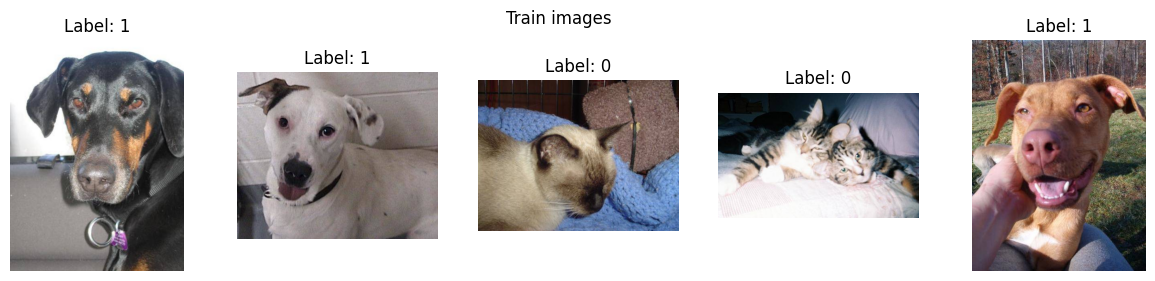

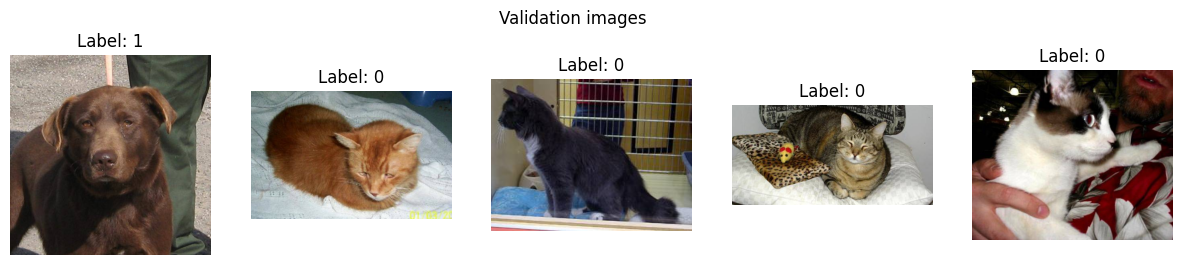

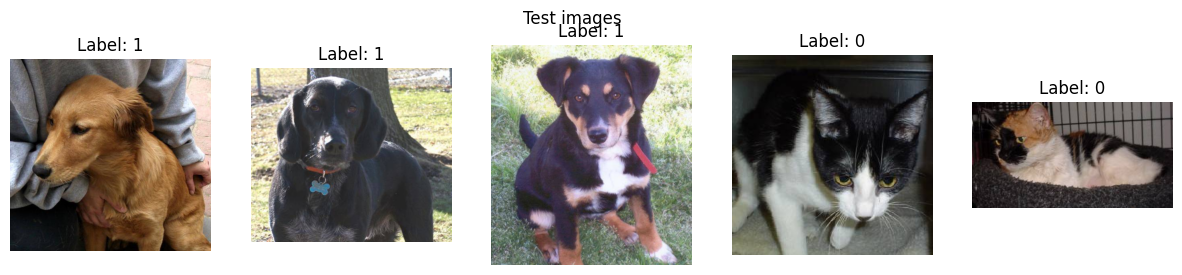

In [12]:
def plot_images_with_labels(images, labels, title, num_images=5):
    # Choose 6 random images and labels   
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(f"Label: {labels[index]}")
        ax.axis('off')  
    plt.suptitle(title)
    plt.show()

plot_images_with_labels(X_train, y_train, 'Train images')
plot_images_with_labels(X_val, y_val, 'Validation images')
plot_images_with_labels(X_test, y_test, 'Test images')

- skapa lämplig plot för att kontrollera att dataseten är balanserade

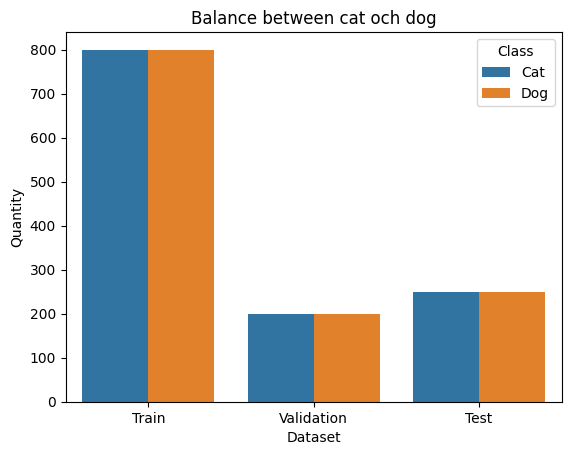

In [13]:
# Function to count all labels
def count_labels(labels):
    cat_count = sum(label == 0 for label in labels)
    dog_count = sum(label == 1 for label in labels)
    return cat_count, dog_count

# Count number of cat and dog in each dataset
train_cat_count, train_dog_count = count_labels(y_train)
val_cat_count, val_dog_count = count_labels(y_val)
test_cat_count, test_dog_count = count_labels(y_test)

data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Cat': [train_cat_count, val_cat_count, test_cat_count],
    'Dog': [train_dog_count, val_dog_count, test_dog_count]
}

df = pd.DataFrame(data)

# Transform DataFrame to long format for Seaborn
df_long = df.melt(id_vars='Dataset', var_name='Class', value_name='Count')

sns.barplot(data=df_long, x='Dataset', y='Count', hue='Class')
plt.xlabel('Dataset')
plt.ylabel('Quantity')
plt.title('Balance between cat och dog')
plt.show()

- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex

In [14]:
# Create a list with index for each dataset
train_index = list(range(len(y_train)))
val_index = list(range(len(y_train), len(y_train) + len(y_val)))
test_index = list(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train, mode='markers', name='Train'))
fig.add_trace(go.Scatter(x=val_index, y=y_val, mode='markers', name='Validation'))
fig.add_trace(go.Scatter(x=test_index, y=y_test, mode='markers', name='Test'))

fig.update_layout(title='Shuffled dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                    tickvals=[0, 1],
                    ticktext=['Cat', 'Dog']
                  ))

fig.show()

### 1. Bildbehandling (*)
Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.
- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.

- Plot alla bilder

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


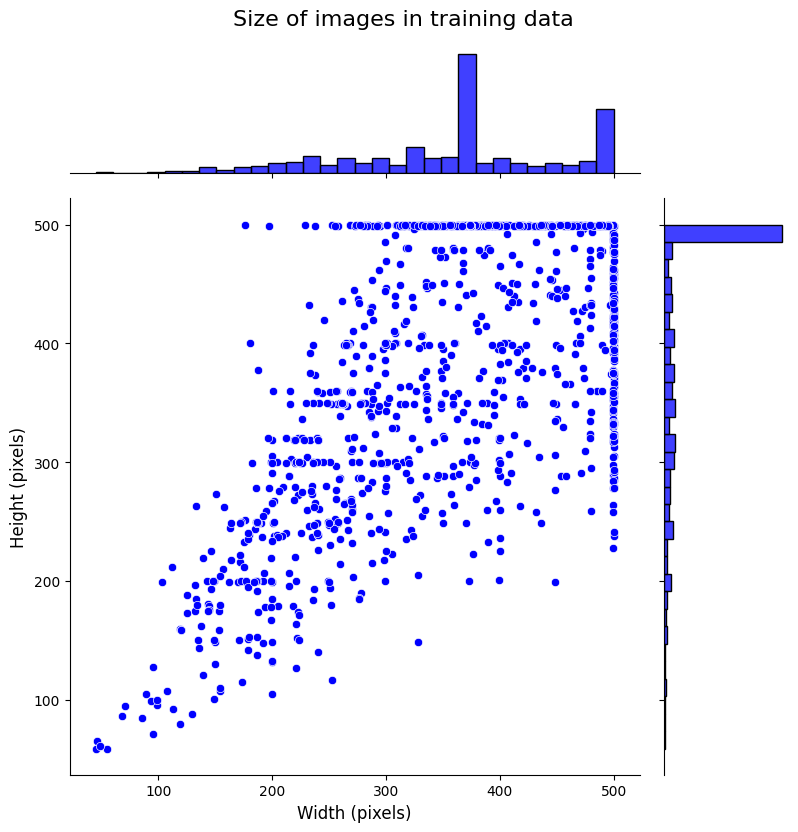

In [11]:
def get_image_sizes(directory, filenames):
    sizes = []
    for filename in filenames:
        with Image.open(os.path.join(directory, filename)) as img:
            sizes.append(img.size)  # img.size returns tuple of (width, height)
    return sizes

# Create array with image sizes
train_sizes = [image.shape[:2] for image in X_train]

# Create dataframe
sizes_df = pd.DataFrame(train_sizes, columns=['Width', 'Height'])

# Create jointplot
jp = sns.jointplot(data=sizes_df, x='Width', y='Height', kind='scatter', color='b', marginal_kws=dict(bins=30, fill=True), height=8, ratio=4)

jp.fig.suptitle('Size of images in training data', fontsize=16, y=1.03)  
jp.set_axis_labels('Width (pixels)', 'Height (pixels)', fontsize=12)

plt.show()

 b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?
<br>
<br>

Jag valde stoleken 180x180 samt att slänga bilder med en bredd mindre än 80 och en höjd mindre än 100 för att sortera ut de allra minsta bilderna. Att förstora allt för små bilder kan leda till förlust av detaljer och pixering vilket kan resultera i en mindre skarp bild. 
Jag vill därför minimera beskärning och skalnings och samtidigt behålla så mycket information som möjligt. Jag vill också att minska antalet mycket stora bilder då det är minneskrävande samt kan påverka träningens prestanda och effektivitet.  

- Plot efter rensade bilder

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


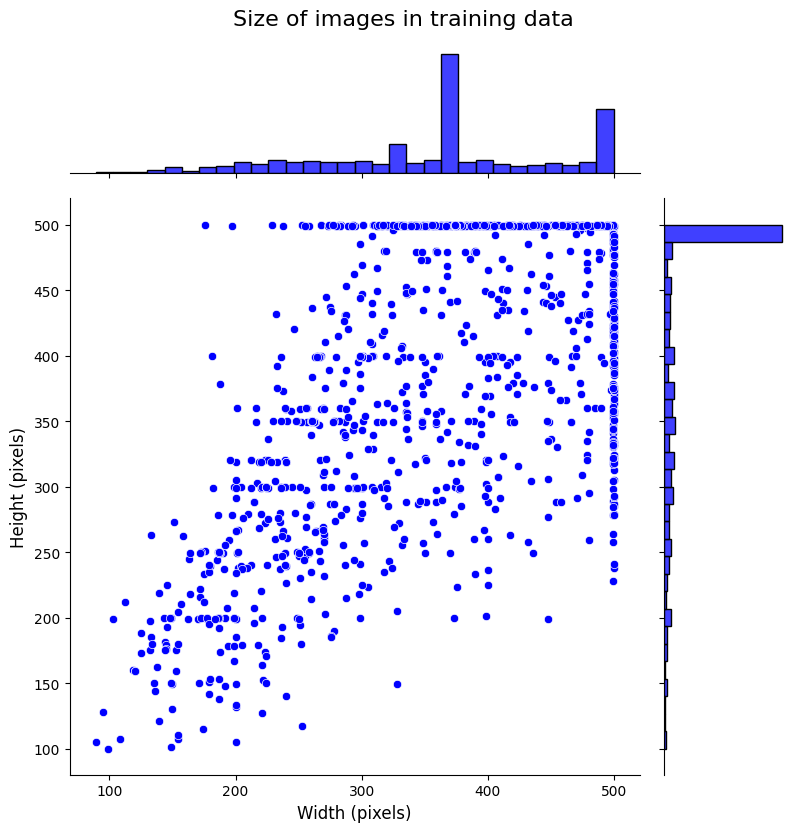

In [12]:
def get_image_sizes(directory, filenames):
    sizes = []
    for filename in filenames:
        with Image.open(os.path.join(directory, filename)) as img:
            sizes.append(img.size)  # img.size returns tuple of (width, height)
    return sizes

# Create array with image sizes
train_sizes = [image.shape[:2] for image in X_train]

# Filter out images with width < 80 and height < 100
filtered_train_sizes = [size for size in train_sizes if size[0] >= 80 and size[1] >= 100]

# Create dataframe
sizes_df = pd.DataFrame(filtered_train_sizes, columns=['Width', 'Height'])

# Create jointplot
jp = sns.jointplot(data=sizes_df, x='Width', y='Height', kind='scatter', color='b', marginal_kws=dict(bins=30, fill=True), height=8, ratio=4)

jp.fig.suptitle('Size of images in training data', fontsize=16, y=1.03)  
jp.set_axis_labels('Width (pixels)', 'Height (pixels)', fontsize=12)

plt.show()

c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
- (samples, row, cols, color_channels) 

In [13]:
def resize_images(directory, filenames, size=(180, 180)):
    image_data = np.zeros((len(filenames), size[0], size[1], 3))
    for i, filename in enumerate(filenames):
        with Image.open(os.path.join(directory, filename)) as img:
            img = img.resize(size, Image.Resampling.LANCZOS)
            img_array = np.array(img)
            if img_array.shape[-1] == 4:  # Check if the image has an alpha channel
                img_array = img_array[..., :3]  # Remove alpha channel
            image_data[i] = img_array  # Assign the processed image to image_data at index i
    return image_data

X_train = resize_images(train_path, train_list)
X_val = np.array(resize_images(val_path, val_list))
X_test = np.array(resize_images(test_path, test_list))


In [18]:
X_train.shape

(1600, 180, 180, 3)

In [14]:
# Create list with indices 
indices_to_keep = [i for i, size in enumerate(train_sizes) if size in filtered_train_sizes]

# Keep images from indices_to _keep
X_train = np.array([X_train[i] for i in indices_to_keep])
y_train = np.array([y_train[i] for i in indices_to_keep])

In [20]:
X_train.shape

(1587, 180, 180, 3)

In [21]:
y_train.shape

(1587,)

### Scaling

In [15]:
X_train[1].flatten().min(), X_train[1].flatten().max()

(0.0, 255.0)

In [16]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [17]:
print(X_train.flatten().min(), X_train.flatten().max())
print(X_test.flatten().min(), X_test.flatten().max())
print(X_val.flatten().min(), X_val.flatten().max())

0.0 1.0
0.0 1.0
0.0 1.0


### 2. Träna modeller (*)
a) Använd följande nätverk och träna på datan. Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D

In [20]:
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='CNN_model')

    # Adding layers 
    for kernel in kernels:
        model.add(
            Conv2D(
                kernel,  
                kernel_size=(3, 3),  
                activation='relu', 
                kernel_initializer='he_normal',  # initializing weights
                input_shape=(180, 180, 3) if not model.layers else None
            )
        )
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # subsampling layer

    model.add(Flatten())  # flatten layer
    model.add(Dropout(dropout_rate))  # dropout layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))  # fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

    return model

model = cnn_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,550,273 (21.17 MB)

 Trainable params: 5,550,273 (21.17 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stopper = EarlyStopping(monitor="val_acc", mode="max", patience=15)

model.fit(
    X_train,
    y_train,
    epochs=50,
    callbacks=[early_stopper],
    validation_data=(X_val,y_val))

Epoch 1/50
 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.5330 - loss: 11.4697

I0000 00:00:1716371319.972836     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716371319.992762     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - acc: 0.5209 - loss: 3.6470

W0000 00:00:1716371327.272524     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716371328.457460     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - acc: 0.5211 - loss: 3.6061 - val_acc: 0.5775 - val_loss: 0.6818
Epoch 2/50
 5/50 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.6385 - loss: 0.6368

W0000 00:00:1716371330.207519     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.6125 - loss: 0.6572 - val_acc: 0.5625 - val_loss: 0.6859
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.6142 - loss: 0.6463 - val_acc: 0.5700 - val_loss: 0.6803
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.6293 - loss: 0.6367 - val_acc: 0.5875 - val_loss: 0.6801
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.6711 - loss: 0.5742 - val_acc: 0.6500 - val_loss: 0.6384
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7031 - loss: 0.5541 - val_acc: 0.6350 - val_loss: 0.6535
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7682 - loss: 0.4814 - val_acc: 0.6475 - val_loss: 0.6621
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7920 - loss: 0.4529 - val_acc: 0.6825 - val_loss: 0.6824
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8219 - loss: 0.3724 - val_acc: 0.6725 - val_loss: 0.7927
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8570 - loss: 0

In [23]:
metrics = pd.DataFrame(model.history.history)

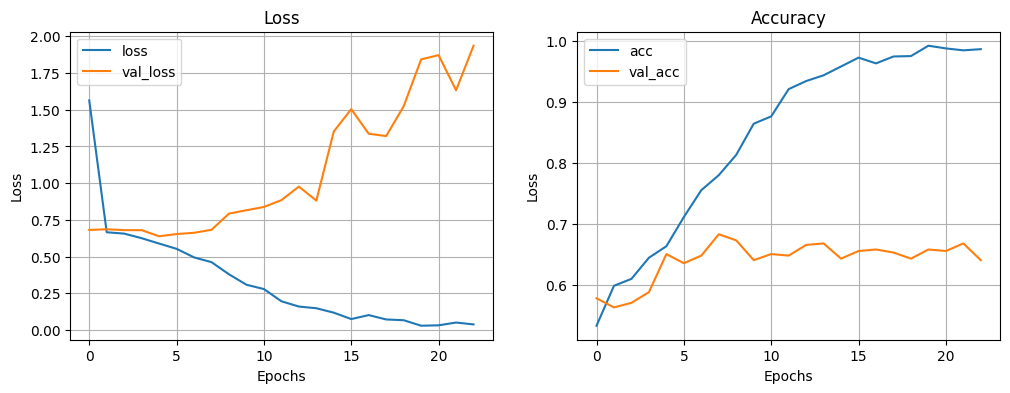

In [24]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

 c) Välj en modell, träna på tränings- och valideringsdatan. Gör inferens på testdatan och utvärdera din
modell. 

Jag ändrar epochs till 10 då jag ser att det är ungefär där den börjar gå uppåt. 

In [25]:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

In [26]:
model = cnn_model()
model.fit(
    X_train_val,
    y_train_val,
    epochs=10,
    callbacks=[early_stopper],
    )

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
 3/63 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.4531 - loss: 6.3809

W0000 00:00:1716371407.671671     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - acc: 0.5103 - loss: 1.9321
Epoch 2/10
 5/63 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.5372 - loss: 0.6831

W0000 00:00:1716371413.854507     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: acc,loss
  current = self.get_monitor_value(logs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.5541 - loss: 0.6835
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.5380 - loss: 0.6953
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.6003 - loss: 0.6598
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.5928 - loss: 0.6624
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.6343 - loss: 0.6359
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.6502 - loss: 0.6155
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.6841 - loss: 0.5951
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7111 - loss: 0.5196
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7505 - loss: 0.4793


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


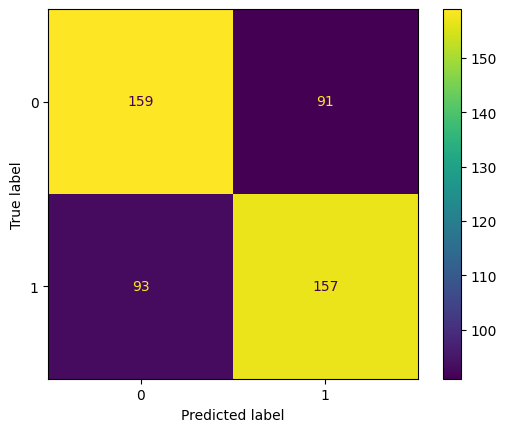

              precision    recall  f1-score   support

     Class 0       0.63      0.64      0.63       250
     Class 1       0.63      0.63      0.63       250

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500



In [27]:
# Gör prediktioner på testdatan
y_pred_prob = model.predict(X_test)

# Konvertera sannolikheter till binära prediktioner
y_pred = (y_pred_prob > 0.5).astype(int)

# Skapa och visa en förvirringsmatris
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Generera och skriv ut en klassificeringsrapport
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)


d) Utför därefter transfer learning och evaluera din modell.
   Beskriv också hur transfer learning fungerar.

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

def build_transfer_model():
    feature_extractor = Xception(
        weights='imagenet', include_top=False, input_shape=(180, 180, 3)
    )
    
    transfer_model = Sequential(
        [
            feature_extractor, # Xception
            GlobalAveragePooling2D(),
            Flatten(),
            Dropout(0.3),
            Dense(512, activation='relu', kernel_initializer='he_normal'),
            Dense(1, activation='sigmoid')
        ]
    )

    # Freeze Xception layers
    for layer in feature_extractor.layers:
        layer.trainable = False

    transfer_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

    return transfer_model

# Bygg en ny instans av transfer model
transfer_model = build_transfer_model()

# Visa modellsummering med en fast batchstorlek
batch_size = 32
transfer_model.build(input_shape=(batch_size, 180, 180, 3))
transfer_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (32, 6, 6, 2048)       │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (32, 2048)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 512)              │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,911,081 (83.58 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [29]:
transfer_model.fit(
    X_train,
    y_train,
    epochs=10,
    callbacks=[early_stopper],
    validation_data=(X_val, y_val)
)

Epoch 1/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.3672 - loss: 1.1461 

W0000 00:00:1716371522.495486     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - acc: 0.8433 - loss: 0.3529

W0000 00:00:1716371534.993706     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716371538.469890     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716371545.799532     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 497ms/step - acc: 0.8451 - loss: 0.3491 - val_acc: 0.9775 - val_loss: 0.0383
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.9910 - loss: 0.0279 - val_acc: 0.9850 - val_loss: 0.0361
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - acc: 0.9960 - loss: 0.0154 - val_acc: 0.9875 - val_loss: 0.0378
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - acc: 0.9994 - loss: 0.0072 - val_acc: 0.9750 - val_loss: 0.0826
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - acc: 0.9979 - loss: 0.0083 - val_acc: 0.9825 - val_loss: 0.0734
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 1.0000 - loss: 0.0020 - val_acc: 0.9800 - val_loss: 0.0520
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.9998 - loss: 0.0045 - val_acc: 0.9800 - val_loss: 0.1079
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - acc: 0.9966 - loss: 0.0096 - val_acc: 0.9875 - val_loss: 0.0444
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - acc: 0.9979 - loss: 

In [30]:
metrics2 = pd.DataFrame(transfer_model.history.history)

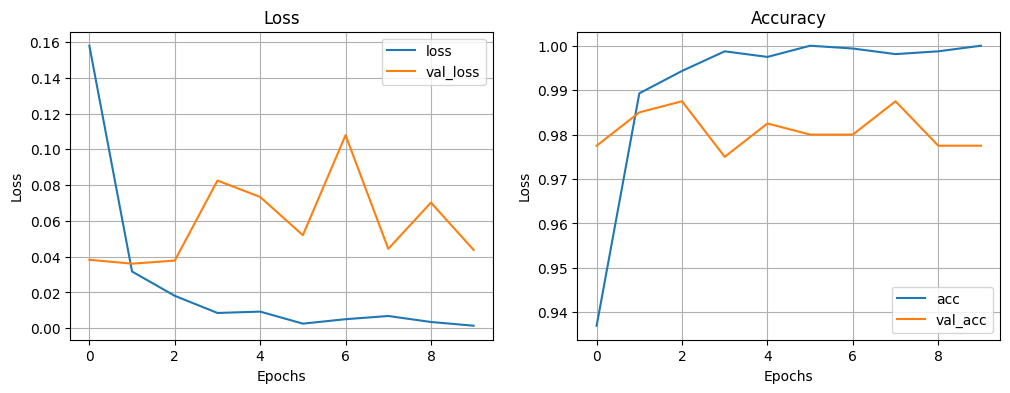

In [31]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics2)

In [32]:
transfer_model = build_transfer_model()
transfer_model.fit(
    X_train_val,
    y_train_val,
    epochs=10,
    callbacks=[early_stopper],
)

Epoch 1/10
 2/63 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.5703 - loss: 0.8180

W0000 00:00:1716371633.231276     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - acc: 0.9126 - loss: 0.1936
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - acc: 0.9688 - loss: 0.0386

W0000 00:00:1716371643.472250     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: acc,loss
  current = self.get_monitor_value(logs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - acc: 0.9886 - loss: 0.0299
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - acc: 0.9827 - loss: 0.0524
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9817 - loss: 0.0545
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9939 - loss: 0.0161
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.9979 - loss: 0.0066
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.9998 - loss: 0.0035
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.9991 - loss: 0.0062
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.9964 - loss: 0.0077
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 1.0000 - loss: 0.0017


 3/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step

W0000 00:00:1716371710.726887     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 616ms/step


W0000 00:00:1716371719.961066     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


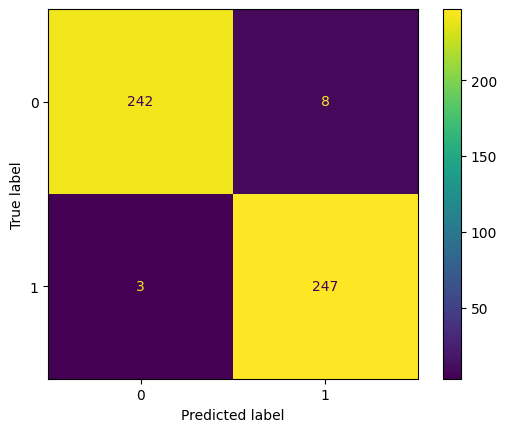

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       250
     Class 1       0.97      0.99      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [33]:
# Gör prediktioner på testdatan
y_pred_prob = transfer_model.predict(X_test)

# Konvertera sannolikheter till binära prediktioner
y_pred = (y_pred_prob > 0.5).astype(int)

# Skapa och visa en förvirringsmatris
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Generera och skriv ut en klassificeringsrapport
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)